# Import packages

In [192]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pickle
import funzioni as fn

plt.rcParams.update({'xtick.color' : 'black', 
                     'ytick.color' : 'black', 
                     'axes.labelcolor' : 'black', 
                     'axes.edgecolor' : 'black', 
                     'figure.facecolor' : 'white', 
                     'axes.facecolor' : '#f7ead4', 
                     'axes.grid' : True, 
                     'axes.axisbelow' : True, 
                     'grid.color' : 'white'})

# Load the .csv file into a Dataframe

In [193]:
df = pd.read_csv('csv\Water_Quality_Prediction.csv')
df.set_index('Index', inplace = True)

# Do some primordial EDA on the dataframe

In [194]:
df.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [195]:
df.shape

(1048575, 23)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   pH                      1028344 non-null  float64
 1   Iron                    1041584 non-null  float64
 2   Nitrate                 1029880 non-null  float64
 3   Chloride                1017741 non-null  float64
 4   Lead                    1043891 non-null  float64
 5   Zinc                    1020900 non-null  float64
 6   Color                   1047594 non-null  object 
 7   Turbidity               1039881 non-null  float64
 8   Fluoride                1015357 non-null  float64
 9   Copper                  1013693 non-null  float64
 10  Odor                    1017243 non-null  float64
 11  Sulfate                 1014050 non-null  float64
 12  Conductivity            1019772 non-null  float64
 13  Chlorine                1038413 non-null  float64
 14  Mangane

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1028344.0,7.449869,0.847846,2.058008e+00,6.914812e+00,7.452940e+00,8.001406e+00,12.891960
Iron,1041584.0,0.113965,0.443319,2.050000e-53,8.950000e-06,2.054149e-03,4.977795e-02,15.748603
Nitrate,1029880.0,6.078584,3.131874,2.861727e-01,3.952811e+00,5.564798e+00,7.584930e+00,73.072931
Chloride,1017741.0,181.865998,65.766569,2.941350e+01,1.374347e+02,1.747464e+02,2.156446e+02,1430.548852
Lead,1043891.0,0.001292,0.030301,0.000000e+00,8.290000e-123,1.520000e-62,2.820000e-27,3.503948
Zinc,1020900.0,1.528928,1.505436,6.350000e-07,4.127921e-01,1.074800e+00,2.214154e+00,28.368672
Turbidity,1039881.0,0.483591,0.861474,1.410000e-14,3.692472e-02,1.997574e-01,5.928613e-01,19.296113
Fluoride,1015357.0,0.941014,0.792490,4.550000e-06,3.706065e-01,7.654291e-01,1.318265e+00,12.851710
Copper,1013693.0,0.493944,0.566243,2.100000e-09,1.260900e-01,3.389322e-01,6.789152e-01,11.390555
Odor,1017243.0,1.772788,1.051316,1.100125e-02,8.772584e-01,1.744323e+00,2.611824e+00,4.141991


In [198]:
df.isnull().sum()

pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

Drop the columns that don't interfeer in the potability of the water and rename the remaining columns so they are more accessible for the analysis done later

In [199]:
df.drop(['Day', 'Time of Day', 'Month', 'Water Temperature', 'Air Temperature', 'Source', 'Lead'], axis = 1, inplace = True)

In [200]:
df.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Color', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Target'],
      dtype='object')

In [201]:
df.columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total_Diss_Solids', 'Potability']

Let's see how our dataframe looks like now

In [202]:
df.head()

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total_Diss_Solids,Potability
Index,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.270000e-15,332.118789,0
1,6.917863,0.000081,3.734167,227.029851,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,0
2,5.443762,0.020106,3.816994,230.995630,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,0
3,7.955339,0.143988,8.224944,178.129940,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028468,3.516907,2.468295e-02,100.043838,0
4,8.091909,0.002167,9.925788,186.540872,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,0


### Replace strings variables with numbers

For the prediction model used later on, we need to have numeric variables and right now we have some columns that have string values.

In [203]:
df['Color'].value_counts().index

Index(['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow',
       'Yellow'],
      dtype='object', name='Color')

In [204]:
df['Color'].replace({'Colorless' : 0,
                     'Near Colorless' : 1,
                     'Faint Yellow' : 2,
                     'Light Yellow' : 3,
                     'Yellow' : 4}, inplace = True)

df['Color'].value_counts()

Color
0.0    326033
1.0    325799
2.0    188039
3.0    124775
4.0     82948
Name: count, dtype: int64

In [205]:
colors = sns.color_palette('pastel')[0:5]
fig = px.pie(values = df['Color'].value_counts(), 
             names = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow'], 
             color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Pie chart of the "Color" attribute', 
             hole = 0.5,
             opacity = 0.9,
             width = 700, height = 500)
fig.update_traces(marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

In [206]:
df_raw = df.copy()

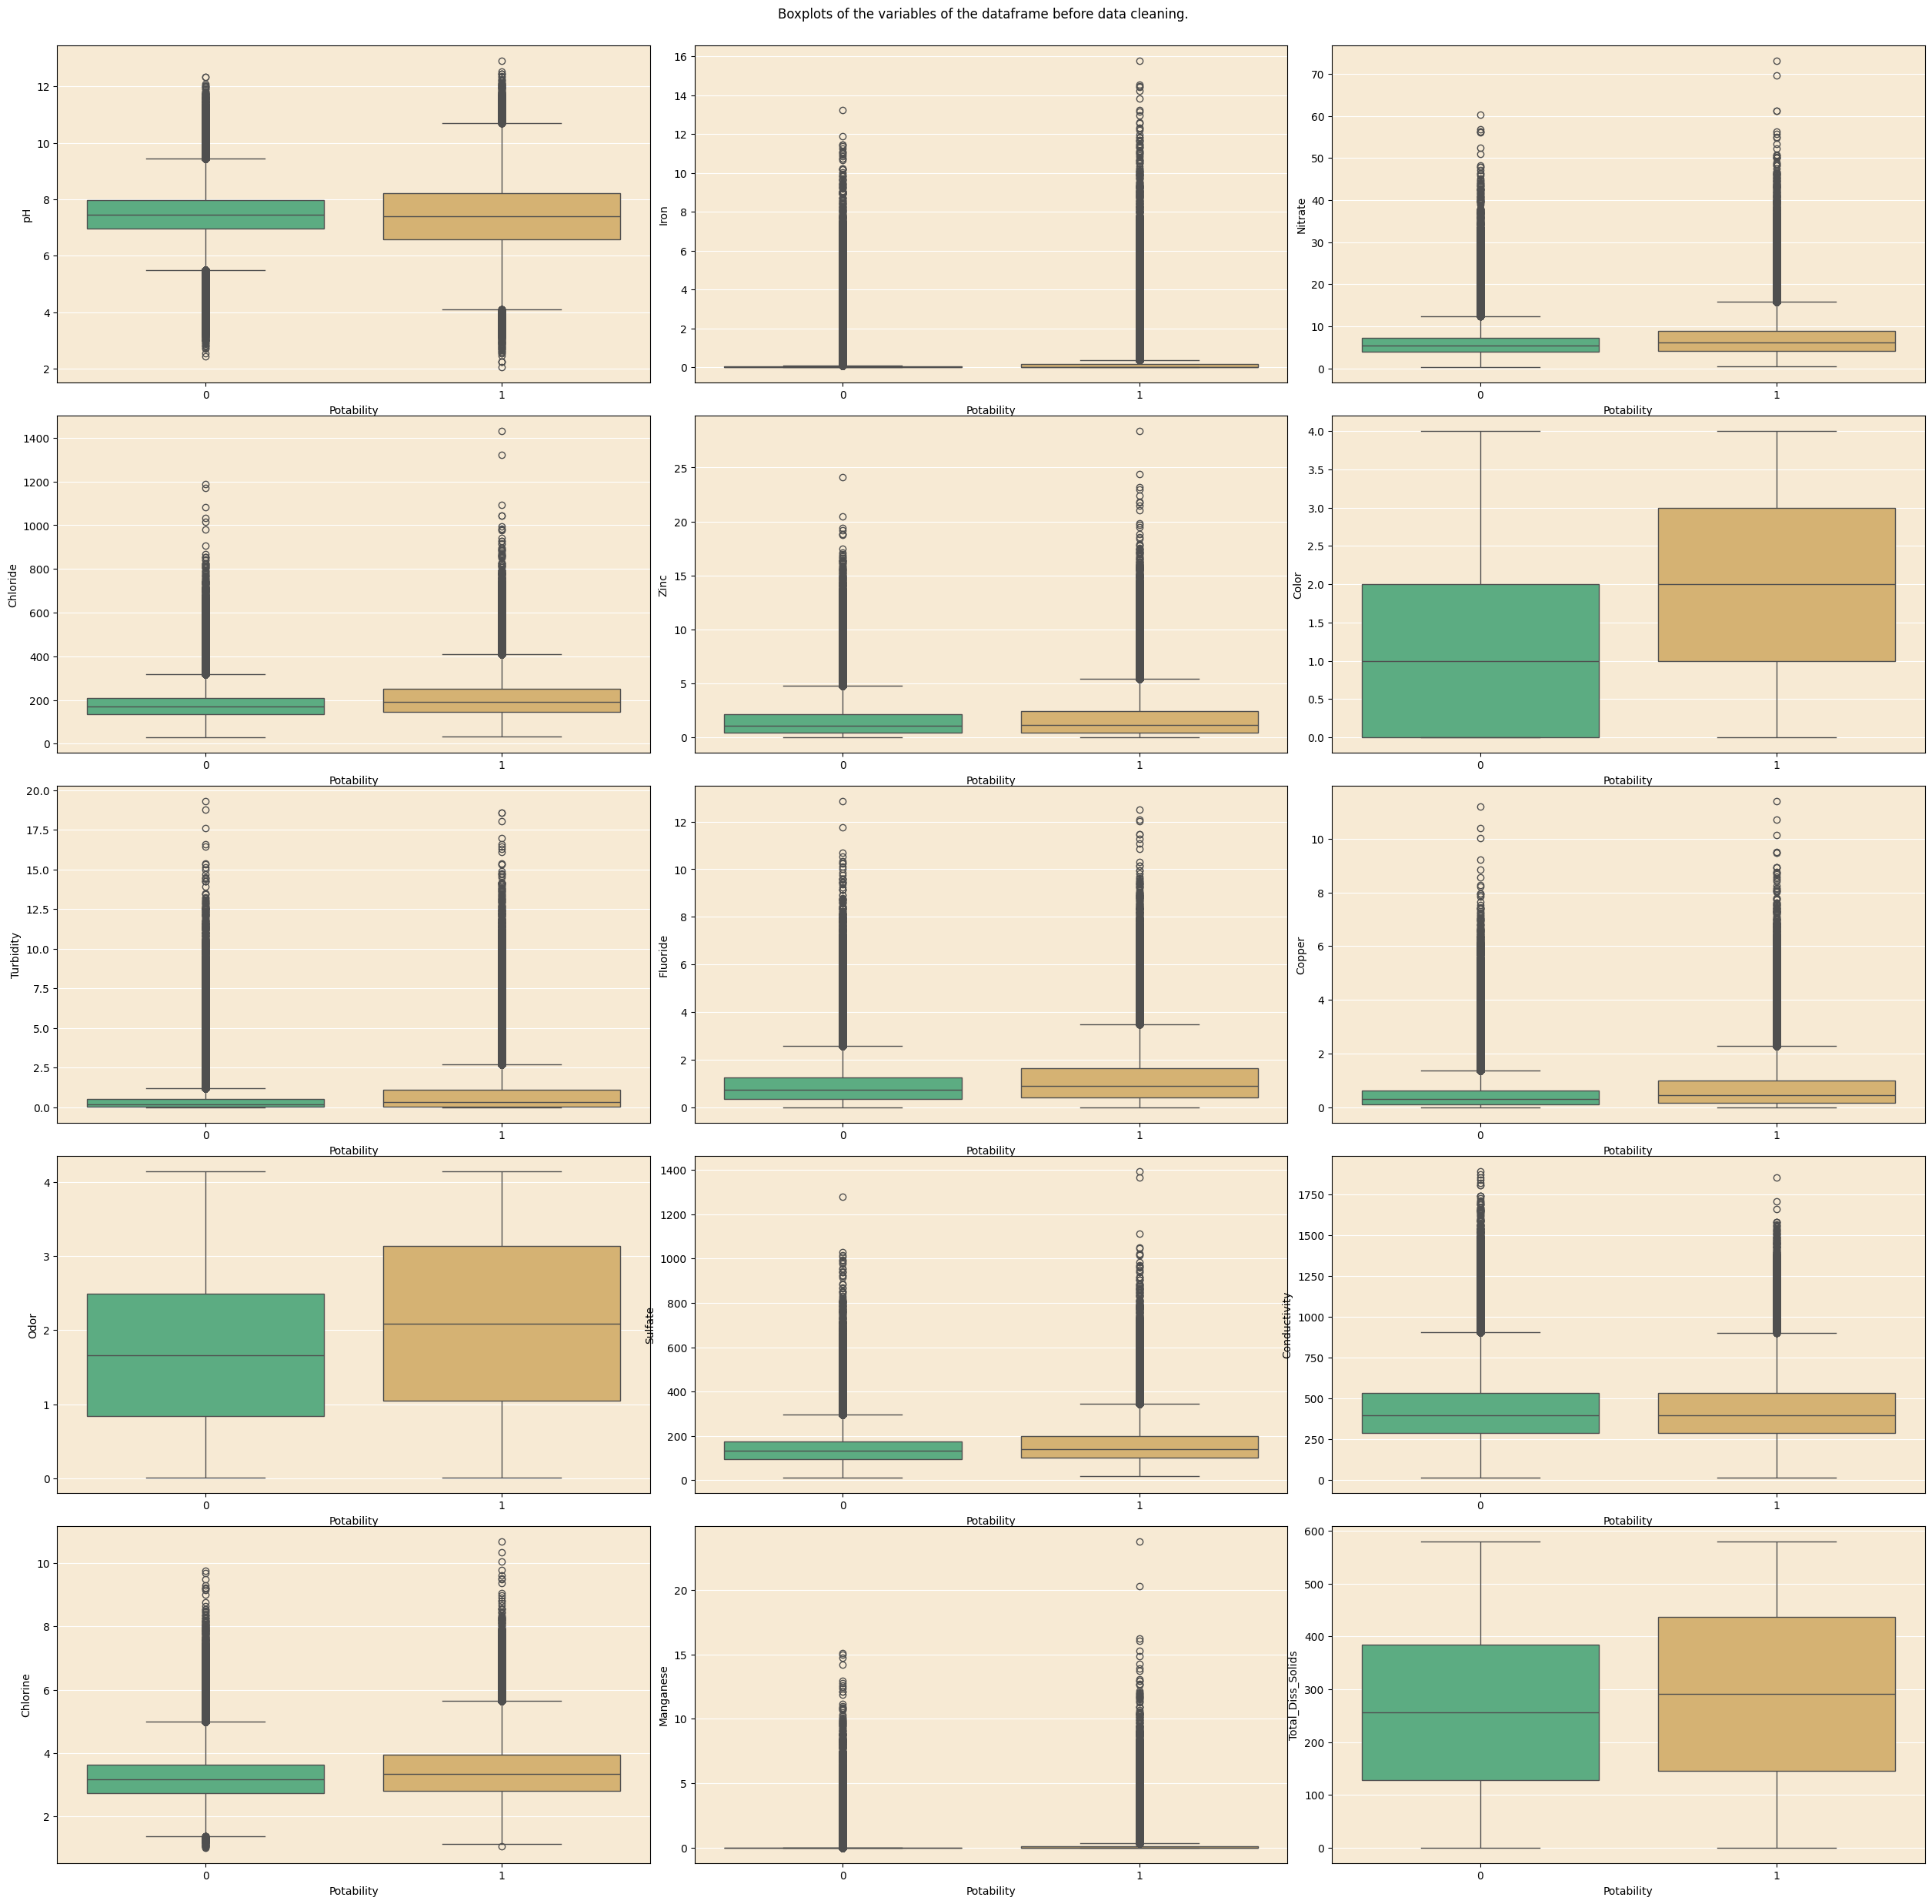

In [ ]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
palette1 = ['#4eba81', '#e5b663']
plt.suptitle('Boxplots of the variables of the dataframe before data cleaning.')
fig_1.tight_layout()
fig_1.subplots_adjust(top = 0.96)

sns.boxplot(x = df['Potability'], y = df['pH'], data = df, ax = axes[0][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Iron'], data = df, ax = axes[0][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Nitrate'], data = df, ax = axes[0][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Chloride'], data = df, ax = axes[1][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Zinc'], data = df, ax = axes[1][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Color'], data = df, ax = axes[1][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Turbidity'], data = df, ax = axes[2][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Fluoride'], data = df, ax = axes[2][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Copper'], data = df, ax = axes[2][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Odor'], data = df, ax = axes[3][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Sulfate'], data = df, ax = axes[3][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Conductivity'], data = df, ax = axes[3][2], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Chlorine'], data = df, ax = axes[4][0], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Manganese'], data = df, ax = axes[4][1], palette = palette1, hue = df['Potability'], legend = False)
sns.boxplot(x = df['Potability'], y = df['Total_Diss_Solids'], data = df, ax = axes[4][2], palette = palette1, hue = df['Potability'], legend = False)

plt.show()

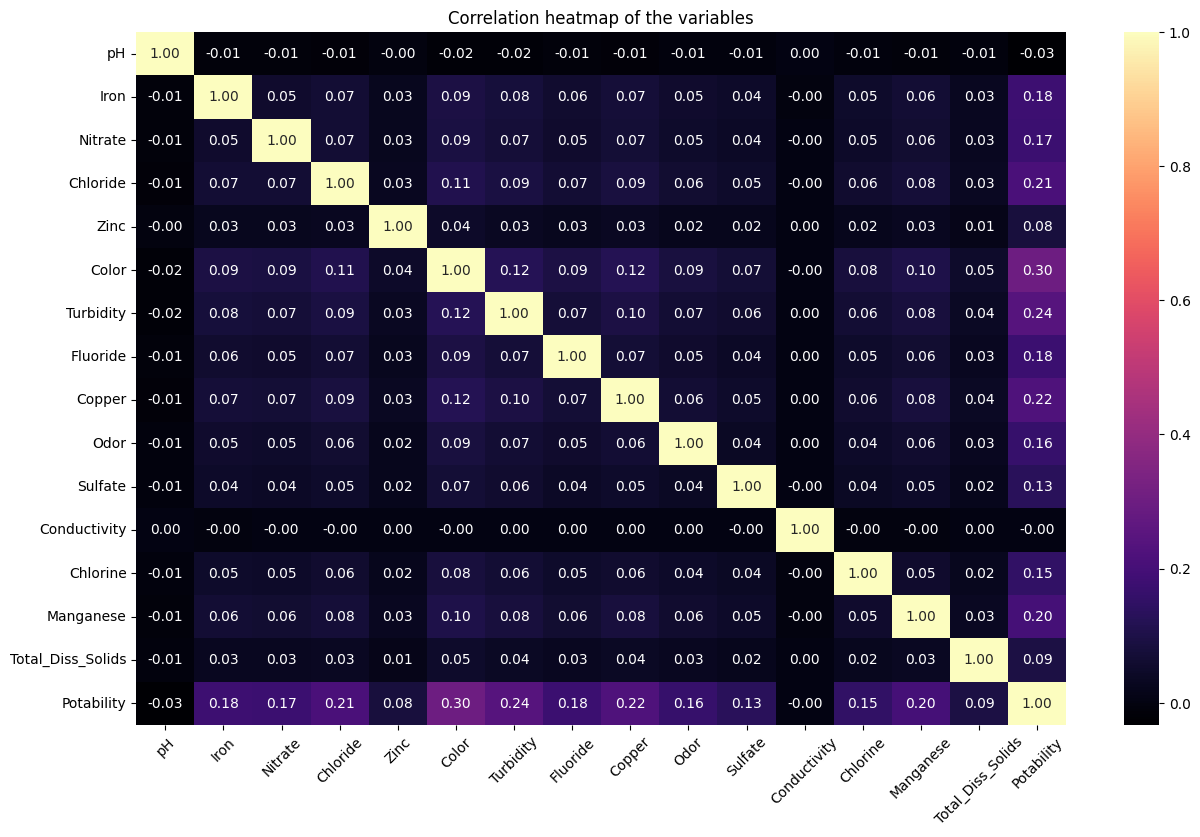

In [207]:
df_corr = df.corr()
plt.figure(figsize = (15, 9))
plt.title('Correlation heatmap of the variables')
sns.heatmap(df_corr, annot = True, cmap = 'magma', fmt = '.2f')
plt.xticks(rotation = 45)
plt.show()

In [208]:
df.isnull().sum().sum()

306660

We can see that inside the dataframe, there are quite a lot of null values. The next portion of the project is concentrated around filling these na's with the most appropriate value, taking in consideration the distributions of the various variables inside the dataframe.

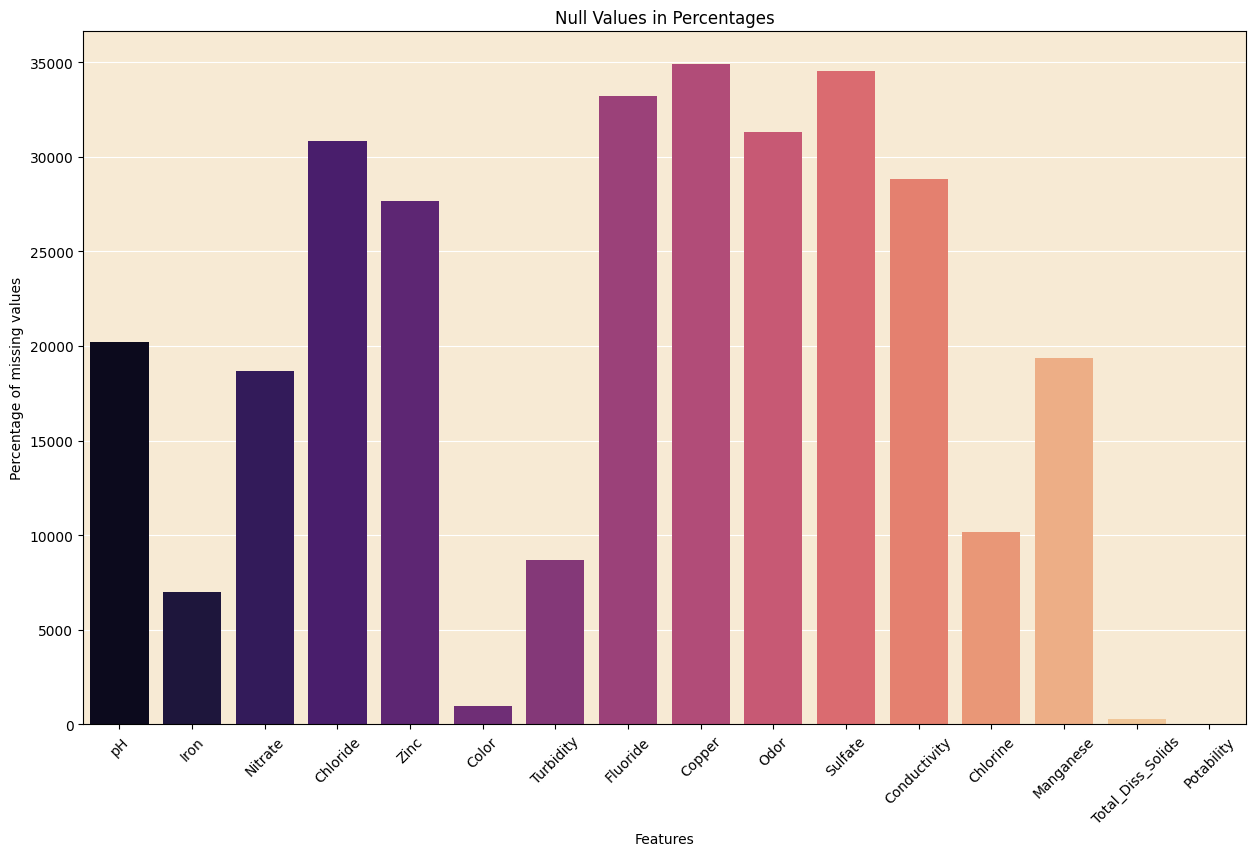

In [209]:
plt.figure(figsize = (15, 9))
sns.barplot(x = df.isnull().sum().index, y = df.isnull().sum(), hue = df.isnull().sum().index, legend = False, palette = 'magma')
plt.xlabel('Features') 
plt.ylabel('Percentage of missing values')
plt.title('Null Values in Percentages')
plt.xticks(rotation = 45)
plt.show()

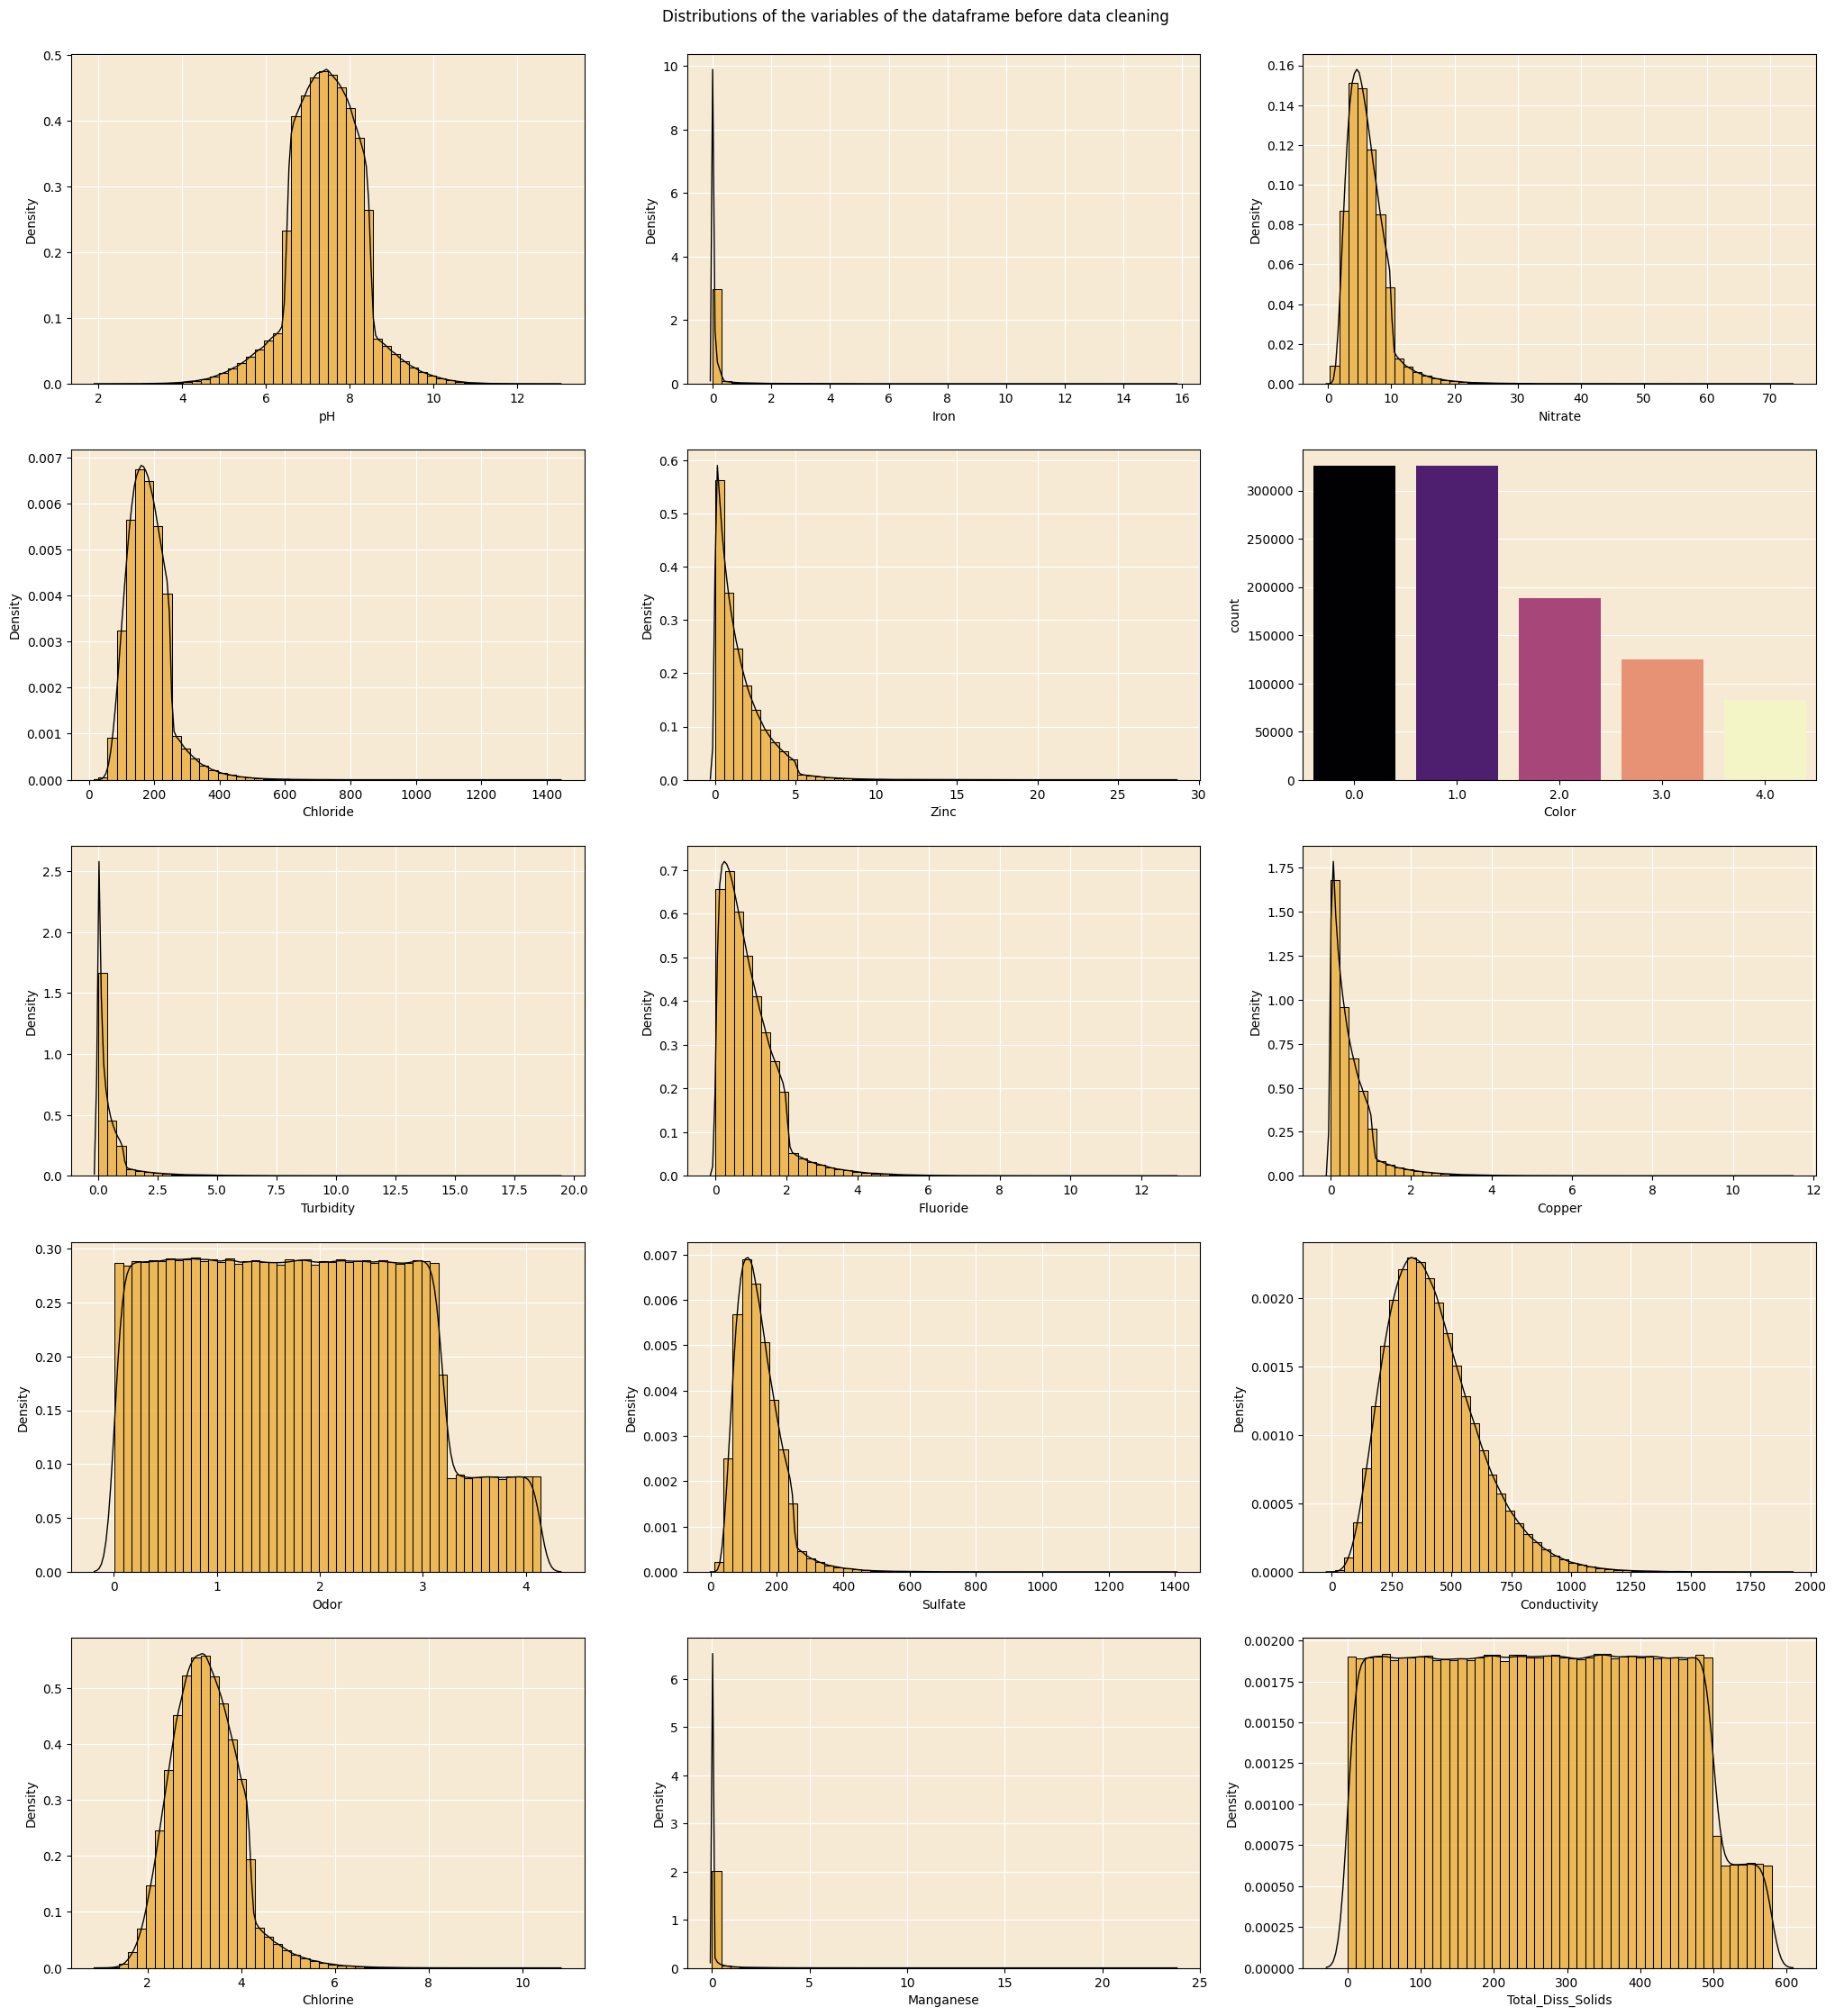

In [ ]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Distributions of the variables of the dataframe before data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.histplot(data = df['pH'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][0])
sns.kdeplot(data = df['pH'], color = 'black', ax = axes[0][0], linewidth = 1)
sns.histplot(data = df['Iron'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][1])
sns.kdeplot(data = df['Iron'], color = 'black', ax = axes[0][1], linewidth = 1)
sns.histplot(data = df['Nitrate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][2])
sns.kdeplot(data = df['Nitrate'], color = 'black', ax = axes[0][2], linewidth = 1)
sns.histplot(data = df['Chloride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][0])
sns.kdeplot(data = df['Chloride'], color = 'black', ax = axes[1][0], linewidth = 1)
sns.histplot(data = df['Zinc'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][1])
sns.kdeplot(data = df['Zinc'], color = 'black', ax = axes[1][1], linewidth = 1)
sns.barplot(x = df['Color'].value_counts().index, y = df['Color'].value_counts(), hue = df['Color'].value_counts().index, legend = False, palette = 'magma', ax = axes[1][2])
sns.histplot(data = df['Turbidity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][0])
sns.kdeplot(data = df['Turbidity'], color = 'black', ax = axes[2][0], linewidth = 1)
sns.histplot(data = df['Fluoride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][1])
sns.kdeplot(data = df['Fluoride'], color = 'black', ax = axes[2][1], linewidth = 1)
sns.histplot(data = df['Copper'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][2])
sns.kdeplot(data = df['Copper'], color = 'black', ax = axes[2][2], linewidth = 1)
sns.histplot(data = df['Odor'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][0])
sns.kdeplot(data = df['Odor'], color = 'black', ax = axes[3][0], linewidth = 1)
sns.histplot(data = df['Sulfate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][1])
sns.kdeplot(data = df['Sulfate'], color = 'black', ax = axes[3][1], linewidth = 1)
sns.histplot(data = df['Conductivity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][2])
sns.kdeplot(data = df['Conductivity'], color = 'black', ax = axes[3][2], linewidth = 1)
sns.histplot(data = df['Chlorine'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][0])
sns.kdeplot(data = df['Chlorine'], color = 'black', ax = axes[4][0], linewidth = 1)
sns.histplot(data = df['Manganese'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][1])
sns.kdeplot(data = df['Manganese'], color = 'black', ax = axes[4][1], linewidth = 1)
sns.histplot(data = df['Total_Diss_Solids'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][2])
sns.kdeplot(data = df['Total_Diss_Solids'], color = 'black', ax = axes[4][2], linewidth = 1)

plt.show()

## pH

In [210]:
df['pH'].isnull().sum()

20231

In [211]:
fn.na_to_norm_distr(df, 'pH')
df = fn.outl_del(df, 'Iron', 0.99, 0.01)

In [212]:
df['pH'].isnull().sum()

0

## Iron

In [213]:
fn.median_col_in_target(df, 'Iron')

Median for target 0: 0.001620614 
Median for target 1: 0.004981953


In [214]:
df['Iron'].describe().T

count    1.020748e+06
mean     7.971181e-02
std      2.305698e-01
min      1.090000e-16
25%      1.050000e-05
50%      2.054209e-03
75%      4.722049e-02
max      2.178348e+00
Name: Iron, dtype: float64

In [215]:
fn.na_to_median_target(df, 'Iron')

In [216]:
df = fn.outl_del(df, 'Iron', 0.99)

In [217]:
df['Iron'].isnull().sum()

0

## Nitrate

In [218]:
df['Nitrate'].isnull().sum()

18076

In [219]:
fn.na_to_norm_distr(df, 'Nitrate')
df = fn.outl_del(df, 'Nitrate', 0.99, 0.01)

In [220]:
df['Nitrate'].isnull().sum()

0

## Chloride

In [221]:
df['Chloride'].isnull().sum()

29164

In [222]:
fn.na_to_norm_distr(df, 'Chloride')
df = fn.outl_del(df, 'Chloride', 0.99, 0.01)

In [223]:
df['Chloride'].isnull().sum()

0

## Zinc

In [224]:
df['Zinc'].isnull().sum()

25519

In [225]:
fn.median_col_in_target(df, 'Zinc')

Median for target 0: 1.05425596 
Median for target 1: 1.143522954


In [226]:
df['Zinc'].describe().T

count    9.427820e+05
mean     1.520638e+00
std      1.490006e+00
min      6.350000e-07
25%      4.114471e-01
50%      1.072172e+00
75%      2.207550e+00
max      2.836867e+01
Name: Zinc, dtype: float64

In [227]:
fn.na_to_median(df, 'Zinc')
df = fn.outl_del(df, 'Zinc', 0.99)

In [228]:
df['Zinc'].isnull().sum()

0

## Color

In [229]:
df['Color'].isnull().sum()

880

In [230]:
fn.median_col_in_target(df, 'Color')

Median for target 0: 1.0 
Median for target 1: 2.0


In [231]:
fn.na_to_median_target(df, 'Color')

In [232]:
df['Color'].isnull().sum()

0

## Turbidity

In [233]:
df['Turbidity'].isnull().sum()

7961

In [234]:
fn.median_col_in_target(df, 'Turbidity')

Median for target 0: 0.172922431 
Median for target 1: 0.33545464950000004


In [235]:
df['Turbidity'].describe().T

count    9.506550e+05
mean     4.658008e-01
std      8.302544e-01
min      1.410000e-14
25%      3.620382e-02
50%      1.955635e-01
75%      5.783320e-01
max      1.929611e+01
Name: Turbidity, dtype: float64

In [236]:
fn.na_to_median_target(df, 'Turbidity')

In [237]:
df = fn.outl_del(df, 'Turbidity', 0.99)

In [238]:
df['Turbidity'].isnull().sum()

0

## Fluoride

In [239]:
df['Fluoride'].isnull().sum()

30102

In [240]:
fn.median_col_in_target(df, 'Fluoride')

Median for target 0: 0.7305309465000001 
Median for target 1: 0.897654657


In [241]:
df['Fluoride'].describe().T

count    918926.000000
mean          0.925999
std           0.770477
min           0.000005
25%           0.367965
50%           0.758463
75%           1.303151
max          12.851710
Name: Fluoride, dtype: float64

In [242]:
fn.na_to_median(df, 'Fluoride')
df = fn.outl_del(df, 'Fluoride', 0.99)

In [243]:
df['Fluoride'].isnull().sum()

0

## Copper

In [244]:
df['Copper'].isnull().sum()

31277

In [245]:
fn.median_col_in_target(df, 'Copper')

Median for target 0: 0.311777099 
Median for target 1: 0.4543736785


In [246]:
df['Copper'].describe()

count    9.082590e+05
mean     4.778030e-01
std      5.407080e-01
min      2.100000e-09
25%      1.242753e-01
50%      3.329994e-01
75%      6.643192e-01
max      1.139056e+01
Name: Copper, dtype: float64

In [247]:
fn.na_to_median(df, 'Copper')
df = fn.outl_del(df, 'Copper', 0.99)

In [248]:
df['Copper'].isnull().sum()

0

## Odor

In [249]:
df['Odor'].isnull().sum()

27873

In [250]:
fn.na_to_unif_distr(df, 'Odor')
df = fn.outl_del(df, 'Odor', 0.99)

In [251]:
df['Odor'].isnull().sum()

0

## Sulfate

In [252]:
df['Sulfate'].isnull().sum()

30309

In [253]:
fn.na_to_norm_distr(df, 'Sulfate')
df = fn.outl_del(df, 'Sulfate', 0.99, 0.01)

In [254]:
df['Sulfate'].isnull().sum()

0

## Conductivity

In [255]:
df['Conductivity'].isnull().sum()

24657

In [256]:
fn.na_to_norm_distr(df, 'Conductivity')
df = fn.outl_del(df, 'Conductivity', 0.99, 0.01)

In [257]:
df['Conductivity'].isnull().sum()

0

## Chlorine

In [258]:
df['Chlorine'].isnull().sum()

8478

In [259]:
fn.na_to_norm_distr(df, 'Chlorine')
df = fn.outl_del(df, 'Chlorine', 0.99, 0.01)

In [260]:
df['Chlorine'].isnull().sum()

0

## Manganese

In [261]:
df['Manganese'].isnull().sum()

15809

In [262]:
fn.median_col_in_target(df, 'Manganese')

Median for target 0: 0.000271876 
Median for target 1: 0.0052853725


In [263]:
df['Manganese'].describe()

count    8.395390e+05
mean     7.648441e-02
std      3.962461e-01
min      1.380000e-46
25%      1.700000e-06
50%      4.353370e-04
75%      1.113469e-02
max      2.374086e+01
Name: Manganese, dtype: float64

In [264]:
fn.na_to_median_target(df, 'Manganese')
df = fn.outl_del(df, 'Manganese', 0.99)

In [265]:
df['Manganese'].isnull().sum()

0

## Total_Diss_Solids

In [266]:
df['Total_Diss_Solids'].isnull().sum()

237

In [267]:
fn.na_to_unif_distr(df, 'Total_Diss_Solids')
df = fn.outl_del(df, 'Total_Diss_Solids', 0.99)

In [268]:
df['Total_Diss_Solids'].isnull().sum()

0

Let's check again the frequencies

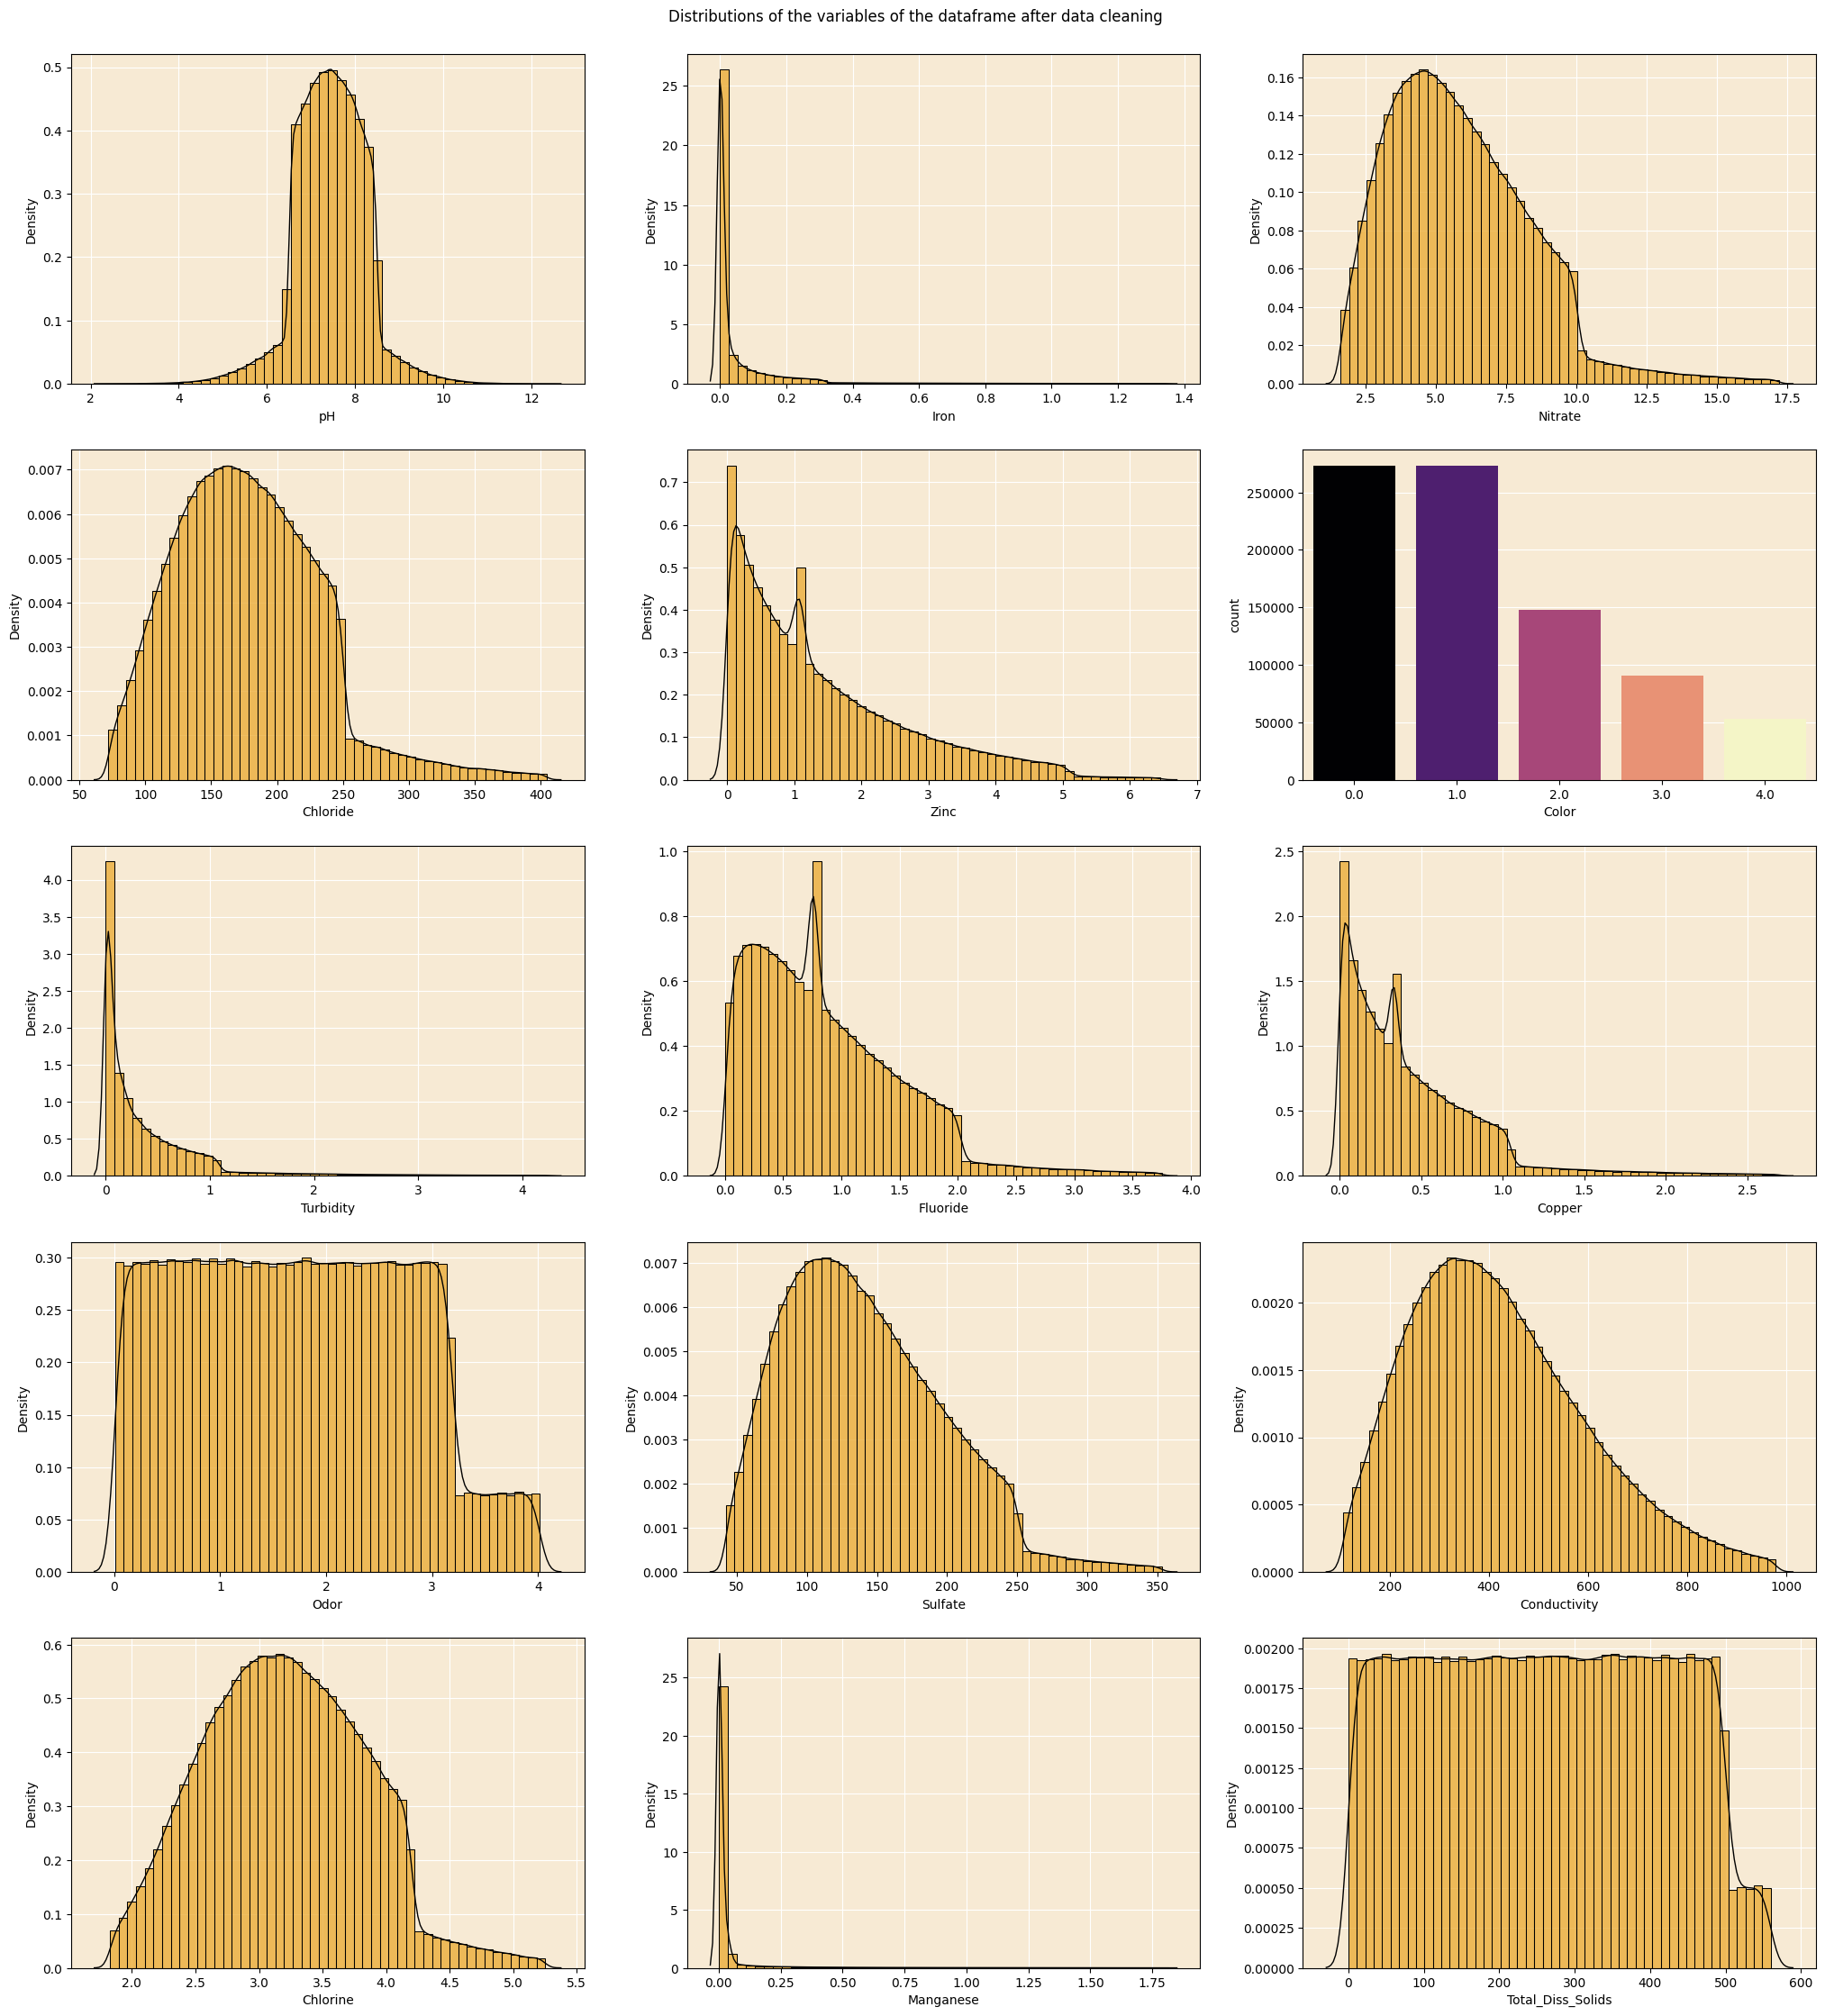

In [ ]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Distributions of the variables of the dataframe after data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.histplot(data = df['pH'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][0])
sns.kdeplot(data = df['pH'], color = 'black', ax = axes[0][0], linewidth = 1)
sns.histplot(data = df['Iron'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][1])
sns.kdeplot(data = df['Iron'], color = 'black', ax = axes[0][1], linewidth = 1)
sns.histplot(data = df['Nitrate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[0][2])
sns.kdeplot(data = df['Nitrate'], color = 'black', ax = axes[0][2], linewidth = 1)
sns.histplot(data = df['Chloride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][0])
sns.kdeplot(data = df['Chloride'], color = 'black', ax = axes[1][0], linewidth = 1)
sns.histplot(data = df['Zinc'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[1][1])
sns.kdeplot(data = df['Zinc'], color = 'black', ax = axes[1][1], linewidth = 1)
sns.barplot(x = df['Color'].value_counts().index, y = df['Color'].value_counts(), hue = df['Color'].value_counts().index, legend = False, palette = 'magma', ax = axes[1][2])
sns.histplot(data = df['Turbidity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][0])
sns.kdeplot(data = df['Turbidity'], color = 'black', ax = axes[2][0], linewidth = 1)
sns.histplot(data = df['Fluoride'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][1])
sns.kdeplot(data = df['Fluoride'], color = 'black', ax = axes[2][1], linewidth = 1)
sns.histplot(data = df['Copper'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[2][2])
sns.kdeplot(data = df['Copper'], color = 'black', ax = axes[2][2], linewidth = 1)
sns.histplot(data = df['Odor'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][0])
sns.kdeplot(data = df['Odor'], color = 'black', ax = axes[3][0], linewidth = 1)
sns.histplot(data = df['Sulfate'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][1])
sns.kdeplot(data = df['Sulfate'], color = 'black', ax = axes[3][1], linewidth = 1)
sns.histplot(data = df['Conductivity'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[3][2])
sns.kdeplot(data = df['Conductivity'], color = 'black', ax = axes[3][2], linewidth = 1)
sns.histplot(data = df['Chlorine'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][0])
sns.kdeplot(data = df['Chlorine'], color = 'black', ax = axes[4][0], linewidth = 1)
sns.histplot(data = df['Manganese'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][1])
sns.kdeplot(data = df['Manganese'], color = 'black', ax = axes[4][1], linewidth = 1)
sns.histplot(data = df['Total_Diss_Solids'], bins = 50, color = '#eaa92e', stat = 'density', ax = axes[4][2])
sns.kdeplot(data = df['Total_Diss_Solids'], color = 'black', ax = axes[4][2], linewidth = 1)

plt.show()

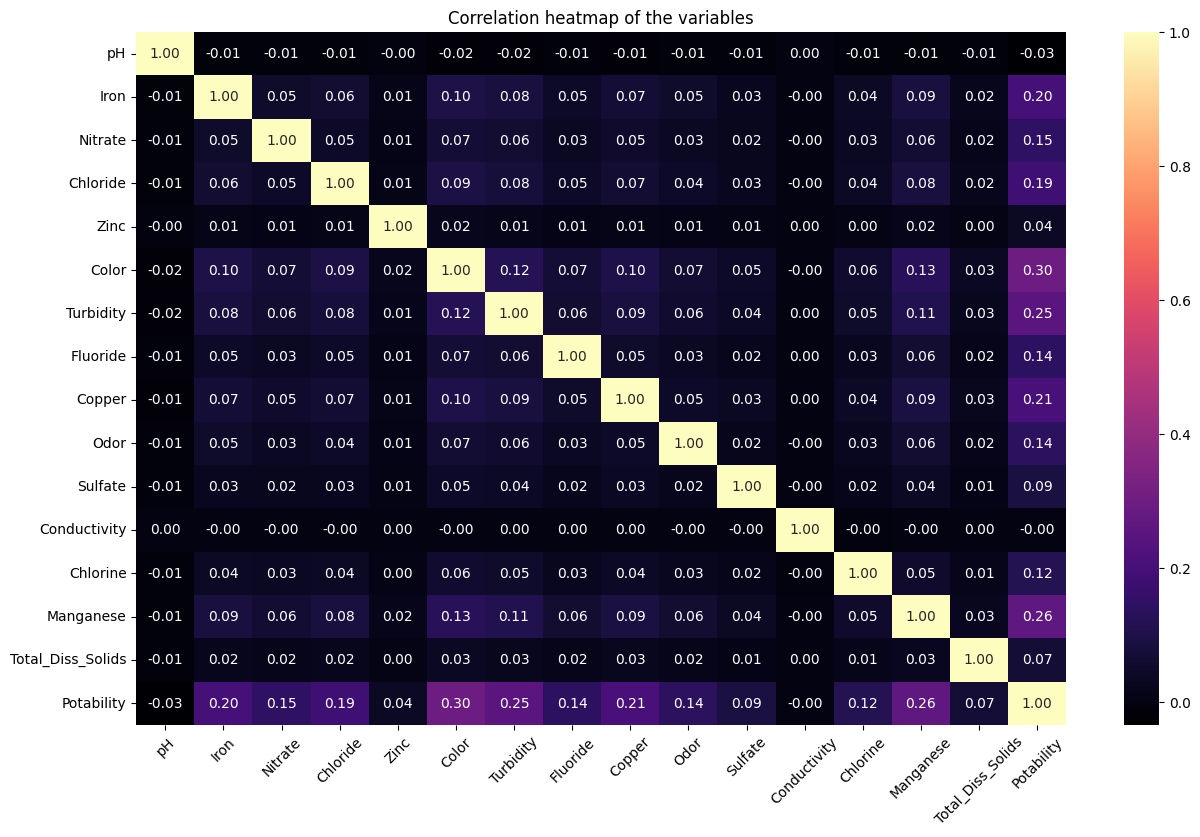

In [269]:
df_corr = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(df_corr, annot = True, cmap = 'magma', fmt = '.2f')
plt.title('Correlation heatmap of the variables')
plt.xticks(rotation = 45)
plt.show()

No big correlations between variables, so we'll keep them all. The only somewhat relevant correlation is between color and potability, as we can see from the following graph.

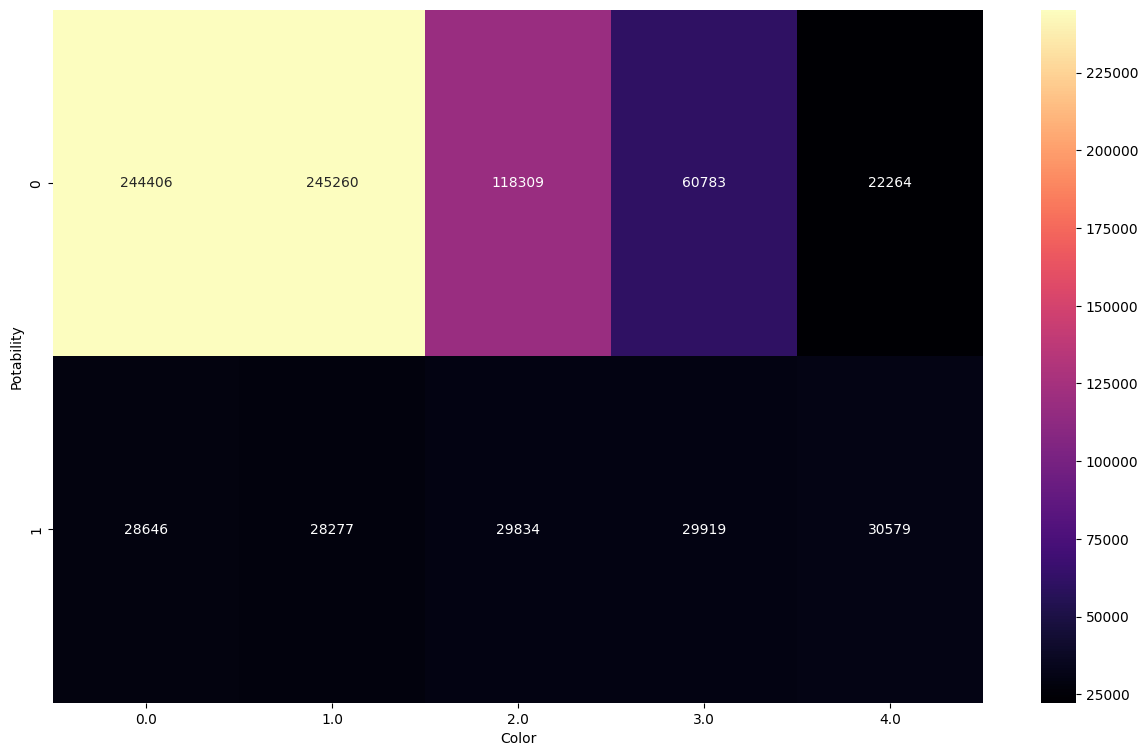

In [270]:
plt.figure(figsize = (15,9))
contingency_table = pd.crosstab(df['Potability'], df['Color'])
sns.heatmap(contingency_table, annot = True, fmt = 'd', cmap = 'magma')
plt.show()

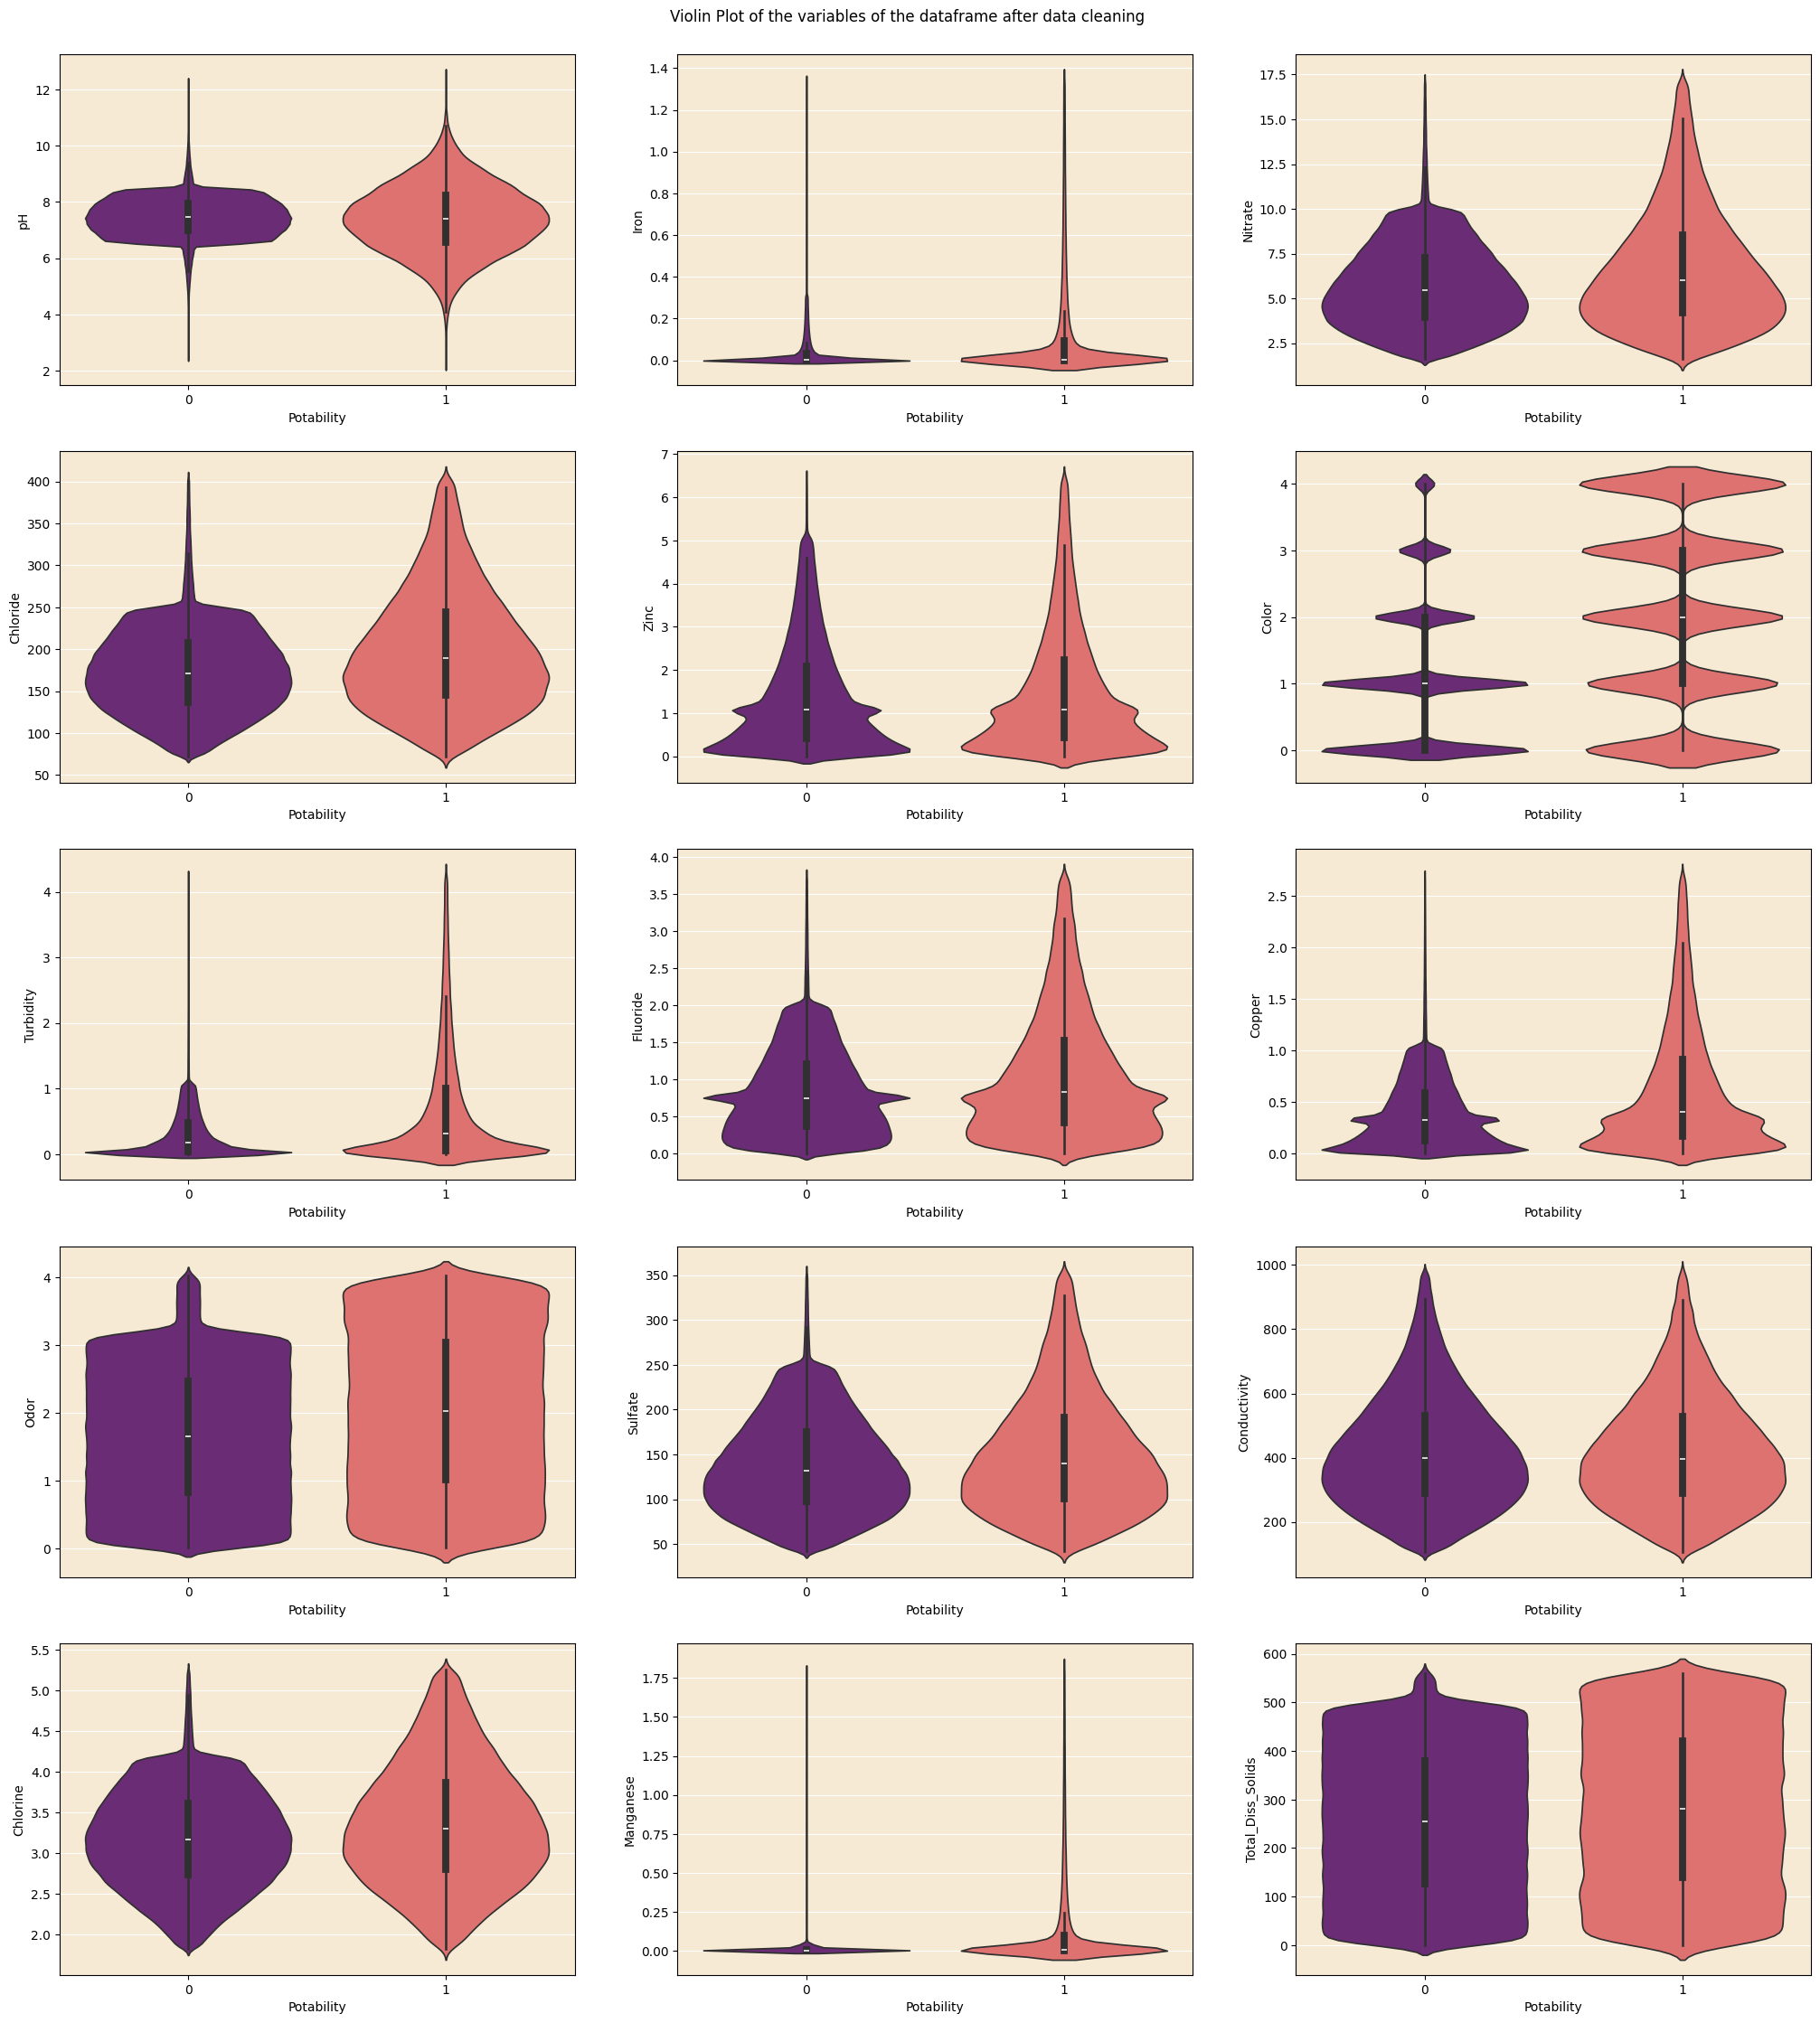

In [ ]:
fig_1, axes = plt.subplots(5, 3, figsize=(25, 25))
plt.suptitle('Violin Plot of the variables of the dataframe after data cleaning')
fig_1.subplots_adjust(top = 0.96)

sns.violinplot(x = 'Potability', y = 'pH', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][0])
sns.violinplot(x = 'Potability', y = 'Iron', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][1])
sns.violinplot(x = 'Potability', y = 'Nitrate', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[0][2])
sns.violinplot(x = 'Potability', y = 'Chloride', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][0])
sns.violinplot(x = 'Potability', y = 'Zinc', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][1])
sns.violinplot(x = 'Potability', y = 'Color', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[1][2])
sns.violinplot(x = 'Potability', y = 'Turbidity', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][0])
sns.violinplot(x = 'Potability', y = 'Fluoride', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][1])
sns.violinplot(x = 'Potability', y = 'Copper', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[2][2])
sns.violinplot(x = 'Potability', y = 'Odor', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][0])
sns.violinplot(x = 'Potability', y = 'Sulfate', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][1])
sns.violinplot(x = 'Potability', y = 'Conductivity', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[3][2])
sns.violinplot(x = 'Potability', y = 'Chlorine', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][0])
sns.violinplot(x = 'Potability', y = 'Manganese', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][1])
sns.violinplot(x = 'Potability', y = 'Total_Diss_Solids', data = df, palette = 'magma', hue = 'Potability', legend = False, ax = axes[4][2])

plt.show()

# Target Imbalanced

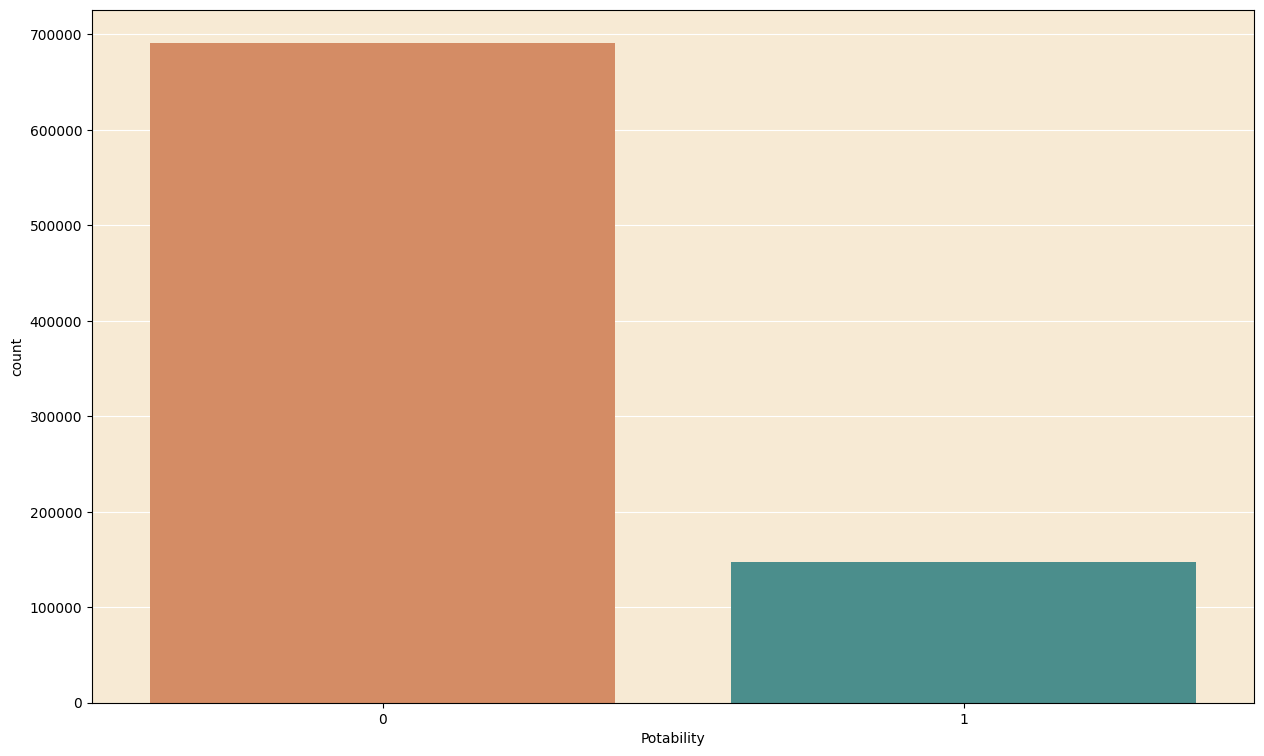

In [166]:
palette1 = ['#E68753', '#409996']
plt.figure(figsize = (15, 9))
sns.countplot(x = df['Potability'], data = df, palette = palette1, hue = df['Potability'], legend = False)
plt.show()

In [167]:
X = df.drop(columns = ['Potability'])
y = df['Potability']

In [168]:
rus = RandomUnderSampler(random_state = 1)

In [169]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [170]:
df = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.Series(y_resampled, name = 'Potability')], axis=1)
df.reset_index(drop = True, inplace = True)

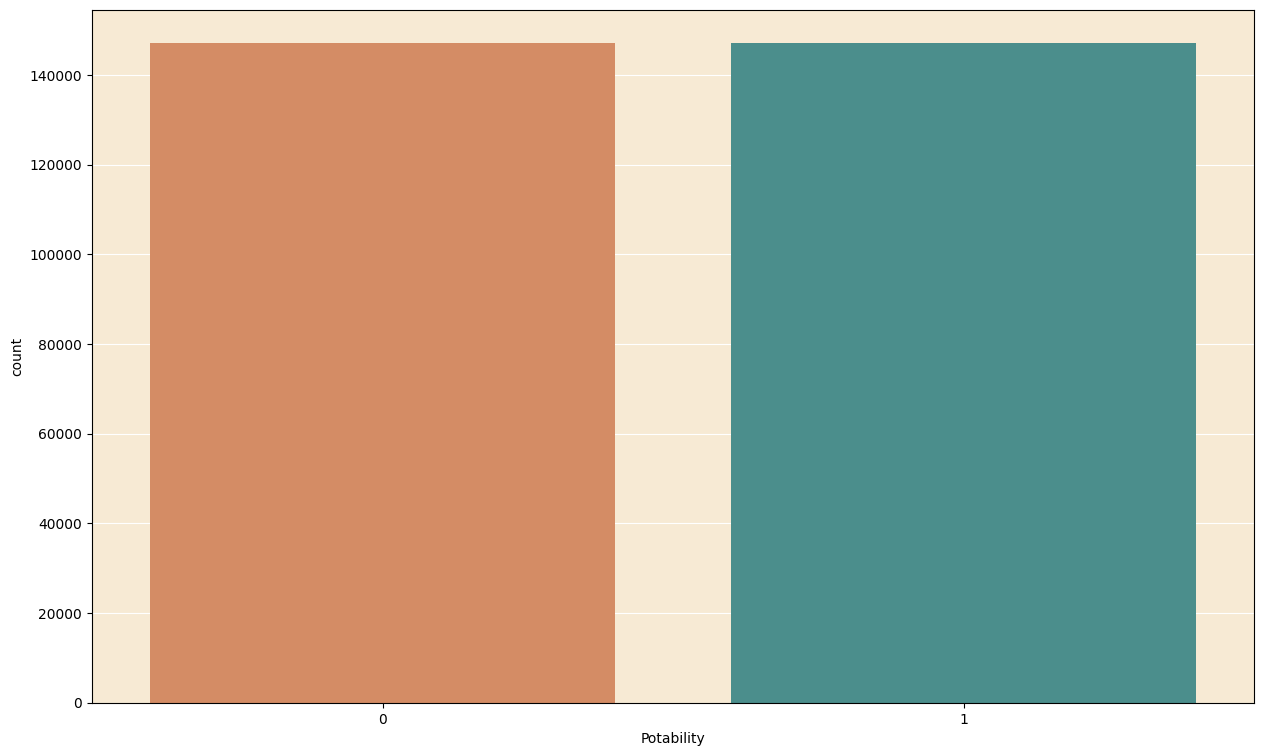

In [171]:
plt.figure(figsize = (15, 9))
ax = sns.countplot(x = df['Potability'], data = df, palette = palette1, hue = df['Potability'], legend = False)
plt.show()

# Split the data in train and test

In [172]:
df1 = df.copy()
df1 = df1.sample(frac = 1, random_state = 1)

In [173]:
df1 = df1[:20000]

In [174]:
X = df.drop('Potability', axis = 1)
y = df['Potability']
X1 = df1.drop('Potability', axis = 1)
y1 = df1['Potability']

In [175]:
print(y1.value_counts())
print(X1.shape)

Potability
1    10013
0     9987
Name: count, dtype: int64
(20000, 15)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 15), (6000, 15), (14000,), (6000,))

In [177]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train_full.shape, X_test_full.shape, y_train_full.shape, y_test_full.shape

((206035, 15), (88301, 15), (206035,), (88301,))

# Predict the potability of the water

## SVM model

In [178]:
clf_svm = svm.SVC(random_state = 1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [179]:
f1_score_svm = f1_score(y_test, y_pred_svm, average = None, labels = [0, 1])
print(f'F1 score for the svm model applied to the dataset: {f1_score_svm[0] * 100:.2f}%, {f1_score_svm[1] * 100:.2f}%')

F1 score for the svm model applied to the dataset: 71.86%, 55.70%


Not the best score for our model, we'll try to improve that by standardizing the train dataset with a pipeline. 

In [180]:
pipe_svm = make_pipeline(StandardScaler(), clf_svm)
pipe_svm.fit(X_train, y_train)
y_pred_pipe_svm = pipe_svm.predict(X_test)

In [181]:
f1_score_pipe_svm = f1_score(y_test, y_pred_pipe_svm, average = None, labels = [0, 1])
print(f'F1 score for the pipeline svm model applied to the dataset: {f1_score_pipe_svm[0] * 100:.2f}%, {f1_score_pipe_svm[1] * 100:.2f}%')

F1 score for the pipeline svm model applied to the dataset: 87.58%, 87.42%


In [182]:
y_pred_full_svm = pipe_svm.predict(X_test_full)
f1_score_full_svm = f1_score(y_test_full, y_pred_full_svm, average = None, labels = [0, 1])
print(f'F1 score for the svm model applied to the full dataset: {f1_score_full_svm[0] * 100:.2f}%, {f1_score_full_svm[1] * 100:.2f}%')

F1 score for the svm model applied to the full dataset: 87.95%, 87.96%


In [191]:
with open('./models/potability_classifier_svm.pkl', 'wb') as f:
    pickle.dump(pipe_svm, f)

## Logistic Regression model

In [183]:
clf_log = LogisticRegression(max_iter = 10000, random_state = 1)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

In [184]:
f1_score_log = f1_score(y_test, y_pred_log, average = None, labels = [0, 1])
solver0 = clf_log.get_params()['solver']
C0 = clf_log.get_params()['C']
penalty0 = clf_log.get_params()['penalty']

In [ ]:
# grid search for lbfgs newton-cg sag newton-cholesky
grid1 = {'solver' : ['lbfgs', 'newton-cg', 'sag', 'newton-cholesky'],
              'penalty' : [None, 'l2'],
              'C'  : np.logspace(-3,3,7)}
clf_log_cv1 = RandomizedSearchCV(clf_log, grid1, cv = 3, scoring = 'f1', error_score = 'raise')
clf_log_cv1.fit(X_train, y_train)
pipe_log1 = make_pipeline(StandardScaler(), clf_log_cv1)
pipe_log1.fit(X_train, y_train)
y_pred_pipe_log1 = pipe_log1.predict(X_test)
f1_score_pipe_log1 = f1_score(y_test, y_pred_pipe_log1, average = None, labels = [0, 1])
solver1 = clf_log_cv1.best_params_['solver']
C1 = clf_log_cv1.best_params_['C']
penalty1 = clf_log_cv1.best_params_['penalty']

In [186]:
# grid search for liblinear
grid2 = {'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-3,3,7)}
clf_log_cv2 = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 10000), grid2, cv = 3, scoring = 'f1', error_score = 'raise')
clf_log_cv2.fit(X_train, y_train)
pipe_log2 = make_pipeline(StandardScaler(), clf_log_cv2)
pipe_log2.fit(X_train, y_train)
y_pred_pipe_log2 = pipe_log2.predict(X_test)
f1_score_pipe_log2 = f1_score(y_test, y_pred_pipe_log2, average = None, labels = [0, 1])
C2 = clf_log_cv2.best_params_['C']
penalty2 = clf_log_cv2.best_params_['penalty']

In [ ]:
# randomized search for saga
grid3 = {'solver' : ['saga'],
         'penalty' : [None, 'elasticnet', 'l1', 'l2'],
         'C' : np.logspace(-3,3,7),
         'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}
clf_log_cv3 = RandomizedSearchCV(clf_log, grid3, cv = 3, scoring = 'f1', error_score = 'raise')
clf_log_cv3.fit(X_train, y_train)
pipe_log3 = make_pipeline(StandardScaler(), clf_log_cv3)
pipe_log3.fit(X_train, y_train)
y_pred_pipe_log3 = pipe_log3.predict(X_test)
f1_score_pipe_log_3 = f1_score(y_test, y_pred_pipe_log3, average = None, labels = [0, 1])
solver3 = clf_log_cv3.best_params_['solver']
C3 = clf_log_cv3.best_params_['C']
penalty3 = clf_log_cv3.best_params_['penalty']
l1_ratio3 = clf_log_cv3.best_params_['l1_ratio']

In [188]:
print(f'F1 score for the logistic regression model with standard parameters (solver-->{solver0}, C-->{C0}, penalty-->{penalty0}): {f1_score_log[0] * 100:.2f}%, {f1_score_log[1] * 100:.2f}%')
print(f'F1 score for the pipeline logistic regression model with solver-->"{solver1}", C-->"{C1}", penalty-->"{penalty1}" after hyperparameter tuning: {f1_score_pipe_log1[0] * 100:.2f}%, {f1_score_pipe_log1[1] * 100:.2f}%')
print(f'F1 score for the pipeline logistic regression model with solver-->"liblinear", C-->"{C2}", penalty-->"{penalty2}" after hyperparameter tuning: {f1_score_pipe_log2[0] * 100:.2f}%, {f1_score_pipe_log2[1] * 100:.2f}%')
print(f'F1 score for the pipeline logistic regression model with solver-->"saga", C-->"{C3}", penalty-->"{penalty3}", l1 ratio-->"{l1_ratio3}" after hyperparameter tuning: {f1_score_pipe_log_3[0] * 100:.2f}%, {f1_score_pipe_log_3[1] * 100:.2f}%')

F1 score for the logistic regression model with standard parameters (solver-->lbfgs, C-->1.0, penalty-->l2): 80.68%, 78.54%
F1 score for the pipeline logistic regression model with solver-->"newton-cholesky", C-->"10.0", penalty-->"None" after hyperparameter tuning: 80.68%, 78.57%
F1 score for the pipeline logistic regression model with solver-->"liblinear", C-->"10.0", penalty-->"l1" after hyperparameter tuning: 80.68%, 78.57%
F1 score for the pipeline logistic regression model with solver-->"saga", C-->"1.0", penalty-->"l2", l1 ratio-->"0.7" after hyperparameter tuning: 80.68%, 78.57%


In [189]:
pipe_log = pipe_log2
y_pred_full_log = pipe_log.predict(X_test_full)
f1_score_full_log = f1_score(y_test_full, y_pred_full_log, average = None, labels = [0, 1])
print(f'F1 score for the logistic regression model applied to the full dataset: {f1_score_full_log[0] * 100:.2f}%, {f1_score_full_log[1] * 100:.2f}%')

F1 score for the logistic regression model applied to the full dataset: 80.25%, 78.62%


In [190]:
with open('./models/potability_classifier_log.pkl', 'wb') as f:
    pickle.dump(pipe_log, f)